# Data Exploration

This notebook will explore interesting characteristics of our data and its features. Because of some python packages it is better viewed in Jupyter Notebook and not on Github.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import pandas_profiling
import collections
import matplotlib.pyplot as plt
import json
import re
import networkx as nx
import seaborn as sns
sns.set()
sns.set_palette(sns.color_palette("husl", 8)[1:])

C:\Anaconda\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Anaconda\lib\site-packages\ipykernel\kernelapp.py", line 478, in start
    self.io_loop.start()
  File "C:\Anaconda\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIO

This dataframe has the ROI calculated and the *Super Size Me film* which is not part of the largest component dropped. Additional refactorizations of the features dataframe have also been added.
The **original_language** column has been dropped as its value is constant (*en*), and as such carries no additional value.
The categorical columns **Foreign** and **TV Movie** (genres of movies) have also been dropped as their values are always *0* (i.e., none of the movies in out dataset have these genres as their primary genre).

In [2]:
features_df = pd.read_csv('data/refined_features.csv')
features_df.drop(columns = 'Unnamed: 0', inplace = True)
features_df.head()

,movie_id,title,budget,keywords,popularity,production_companies,release_date,revenue,runtime,vote_average,...,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western,roi
0,19995,Avatar,237000000,"{'space colony', 'battle', 'power relations', ...",150.437577,"{'Ingenious Film Partners', 'Dune Entertainmen...",2009-12-10,2787965087,162.0,7.2,...,0,0,0,0,0,1,0,0,0,10.763566
1,285,Pirates of the Caribbean: At World's End,300000000,"{'traitor', 'exotic island', 'pirate', 'east i...",139.082615,"{'Jerry Bruckheimer Films', 'Second Mate Produ...",2007-05-19,961000000,169.0,6.9,...,0,0,0,0,0,0,0,0,0,2.203333
2,206647,Spectre,245000000,"{'based on novel', 'united kingdom', 'british ...",107.376788,"{'Columbia Pictures', 'Danjaq', 'B24'}",2015-10-26,880674609,148.0,6.3,...,0,0,0,0,0,0,0,0,0,2.594590
3,49026,The Dark Knight Rises,250000000,"{'cat burglar', 'hostage drama', 'criminal und...",112.312950,"{'DC Entertainment', 'Warner Bros.', 'Legendar...",2012-07-16,1084939099,165.0,7.6,...,0,0,0,0,0,0,1,0,0,3.339756
4,49529,John Carter,260000000,"{'martian', 'edgar rice burroughs', 'based on ...",43.926995,{'Walt Disney Pictures'},2012-03-07,284139100,132.0,6.1,...,0,0,0,0,0,1,0,0,0,0.092843


For the purposes of the below analysis, the columns **keywords** and **production companies** have also been dropped, as at this point we will not use their values.

In [3]:
features_df.drop(columns = 'keywords', inplace = True)
features_df.drop(columns = 'production_companies', inplace = True)

In [4]:
pfr = pandas_profiling.ProfileReport(features_df)
pfr.to_file("data/ProfileReport.html")

As the first step of our data exploration we will use the [pandas profiling package](https://pypi.org/project/pandas-profiling/), specifically the profile report generator. This way we will get very precise data about each of our features and the distribution of the movies from our subsample. For each feature we will get the number of distinct values, number of missing values (which should be 0 due to preprocessing), and the number of movies with specific values. Additionally for all of the continuous features we will have additional statistical information, and a small bar chart representing the different values. We will also get information about correlations of different features, and a list of warnings about unusual features. **It is important to note that all of the information gathered this way is better viewed in Jupyter Notebook or via the following [link](http://htmlpreview.github.io/?https://github.com/MilenaFilipovic/NTDS_Project_Team_49/blob/master/data/ProfileReport.html)!**

In [5]:
from IPython.core.display import HTML
HTML("data/ProfileReport.html")

Number of variables,28
Number of observations,1942
Total Missing (%),0.0%
Total size in memory,424.9 KiB
Average record size in memory,224.0 B
Numeric,8
Categorical,1
Boolean,18
Date,0
Text (Unique),1
Rejected,0


**We can further explore the features through the interactive plot above**

## Further data exploration

In order to better understand our data, we must look into some additional properties of our features. We will firstly start by observing top 20 most common values for specific features in order to get a better idea of what kind of movies is represented in the subsample, and their characteristics.

In [6]:
#imdb_data.to_csv('data/refined_imdb_data_project_df.csv')
imdb_data = pd.read_csv('data/refined_imdb_data_project_df.csv')
imdb_data.drop(columns = 'Unnamed: 0', inplace = True)
imdb_data.head()

,movie_id,title,cast,crew,budget,genres,keywords,popularity,production_companies,release_date,revenue,runtime,status,vote_average,vote_count
0,19995,Avatar,"{'Kelly Kilgour', 'James Patrick Pitt', 'Peter...","{'Janace Tashjian', 'Luke Caska', 'Shannon Mil...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","{'power relations', 'alien', 'love affair', 'm...",150.437577,"{'Twentieth Century Fox Film Corporation', 'In...",2009-12-10,2787965087,162.0,Released,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"{'David Meunier', 'David Bailie', 'Keira Knigh...","{'Pat Sandston', 'John Dixon', 'Melissa Muik',...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","{'ocean', 'drug abuse', 'pirate', 'calypso', '...",139.082615,"{'Walt Disney Pictures', 'Jerry Bruckheimer Fi...",2007-05-19,961000000,169.0,Released,6.9,4500
2,206647,Spectre,"{'Harald Windisch', 'Patrice Naiambana', 'Anto...","{'Charlie Hounslow', 'Crystal Hadcroft', 'Susa...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","{'british secret service', 'spy', 'based on no...",107.376788,"{'Columbia Pictures', 'Danjaq', 'B24'}",2015-10-26,880674609,148.0,Released,6.3,4466
3,49026,The Dark Knight Rises,"{'Patrick Leahy', 'Grant Babbitt', 'Andres Per...","{'Randle Akerson', 'Kevin Kaska', 'Andrew McEv...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","{'criminal underworld', 'terrorism', 'gotham c...",112.312950,"{'Warner Bros.', 'Syncopy', 'DC Entertainment'...",2012-07-16,1084939099,165.0,Released,7.6,9106
4,49529,John Carter,"{'James Purefoy', 'Joseph Billingiere', 'Davoo...","{'Kristie Matthiae', 'Sara Riesel', 'Daniel Mi...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","{'3d', 'superhuman strength', 'sword and plane...",43.926995,{'Walt Disney Pictures'},2012-03-07,284139100,132.0,Released,6.1,2124


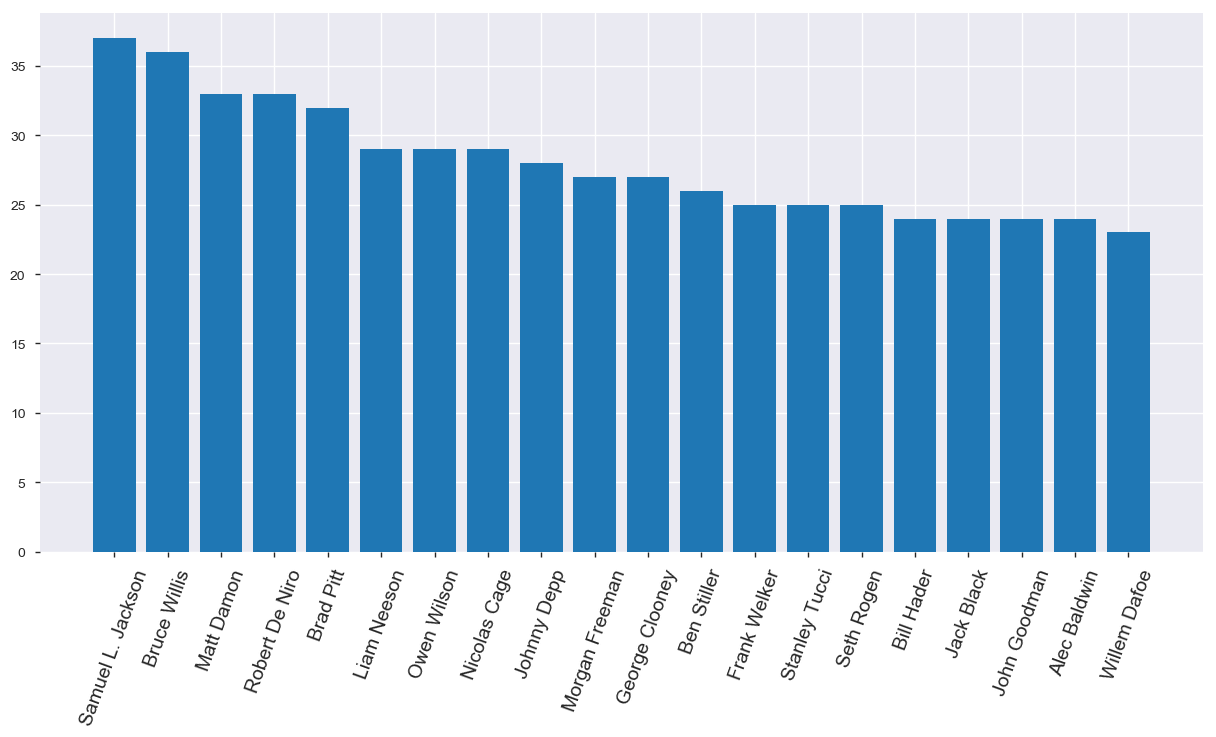

In [7]:
cast_members = collections.Counter()
for ind in imdb_data.index:
    cast = imdb_data.cast[ind]
    cast = re.sub('\"', '\'', cast)
    cast_members.update(re.findall('\'([^\']*)\'', cast))
    
most_common = dict(cast_members.most_common(21)[1:])
plt.figure(figsize=(15,7))
plt.bar(range(len(most_common)), list(most_common.values()), align='center')
plt.xticks(range(len(most_common)), list(most_common.keys()),rotation=70, fontsize=14)
plt.show()

In order to get some interesting insight, we tried to see which 20 actors have been most popular and present in the movies from past several decades. It can easily be seen that the most popular actors are *Samuel L. Jackson* and *Bruce Willis* that both appeared in over 35 movies from the subsample. An interesting observation is that among 20 most represented actors there is almost no diversity, as there is only one actress – *Cameron Diaz* and 3 non-white actors.  

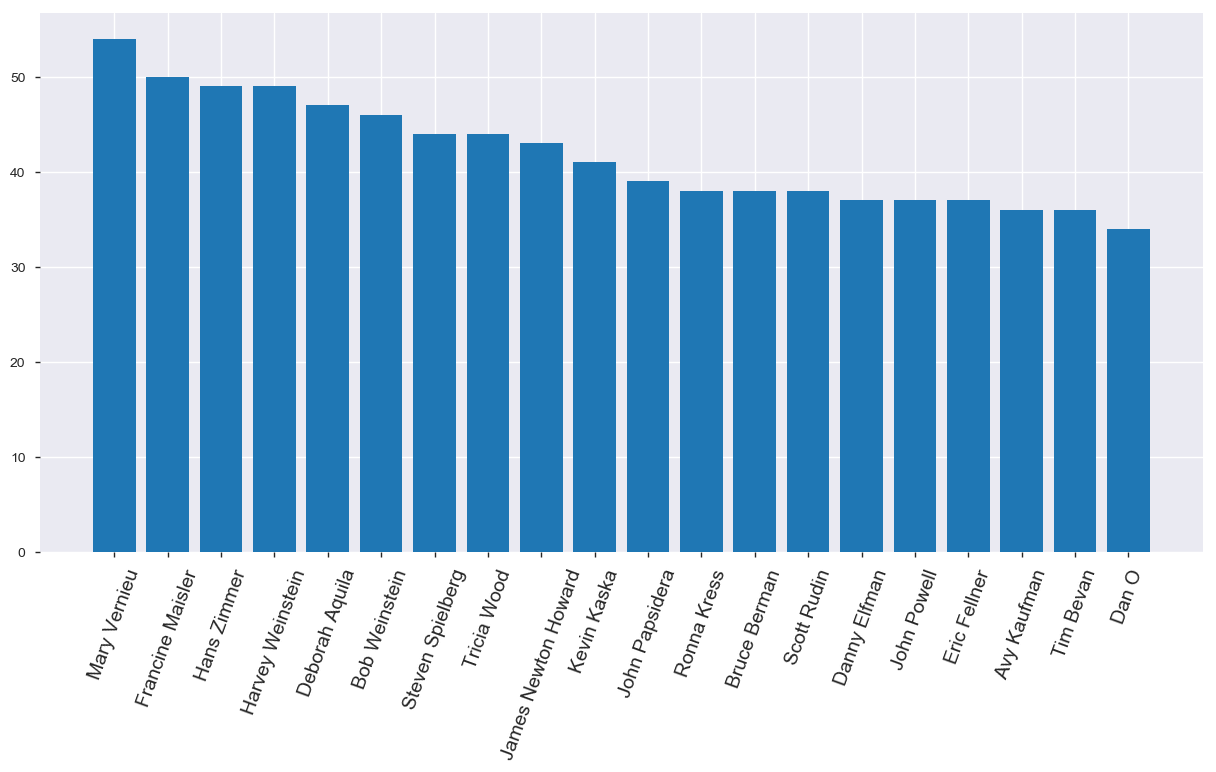

In [8]:
crew_members = collections.Counter()
for ind in imdb_data.index:
    crew = imdb_data.crew[ind]
    crew = re.sub('\"', '\'', crew)
    crew_members.update(re.findall('\'([^\']*)\'', crew))
    
most_common = dict(crew_members.most_common(21)[1:])
plt.figure(figsize=(15,7))
plt.bar(range(len(most_common)), list(most_common.values()), align='center')
plt.xticks(range(len(most_common)), list(most_common.keys()),rotation=70, fontsize=14)
plt.show()

When observing the most featured crew members we can see that their roles vary from sound editors to producers, but that in general they are able to participate in more movies than even the most dedicated actors, with *Hans Zimmer* working on almost 50 movies from the analyzed subsample.

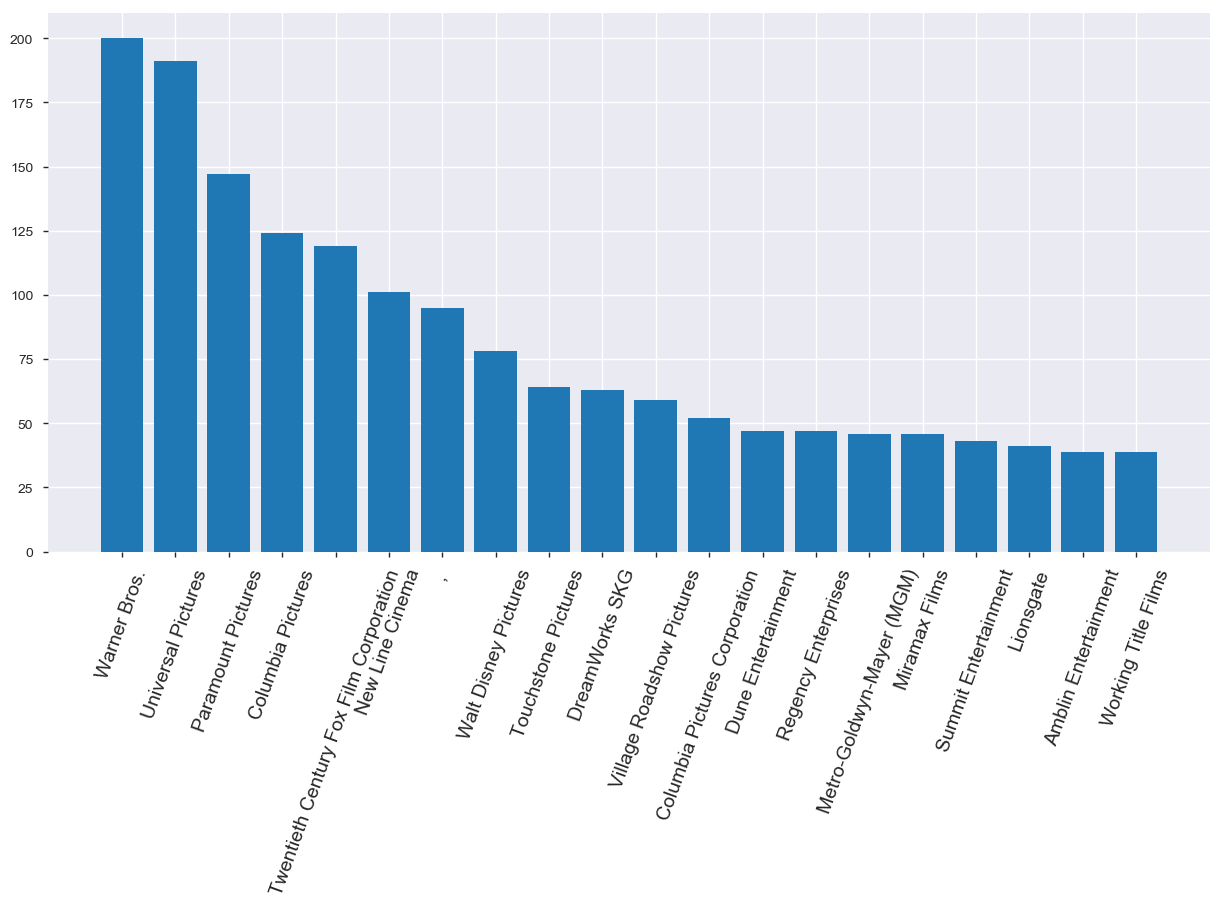

In [9]:
production_companies = collections.Counter()
for ind in imdb_data.index:
    pc = imdb_data.production_companies[ind]
    pc = re.sub('\"', '\'', pc)
    production_companies.update(re.findall('\'([^\']*)\'', pc))


most_common = dict(production_companies.most_common(21)[:7] + production_companies.most_common(21)[8:])
plt.figure(figsize=(15,7))
plt.bar(range(len(most_common)), list(most_common.values()), align='center')
plt.xticks(range(len(most_common)), list(most_common.keys()),rotation=70, fontsize=14)
plt.show()

Most frequent production companies are the generally the ones that are the most famous, and top three are for example *Warner Bros*, *Universal Pictures* and *Paramount Pictures*. We can see that some of the largest production companies can create and distribute almost 200 films, with different cast and crew members related to each of the projects.

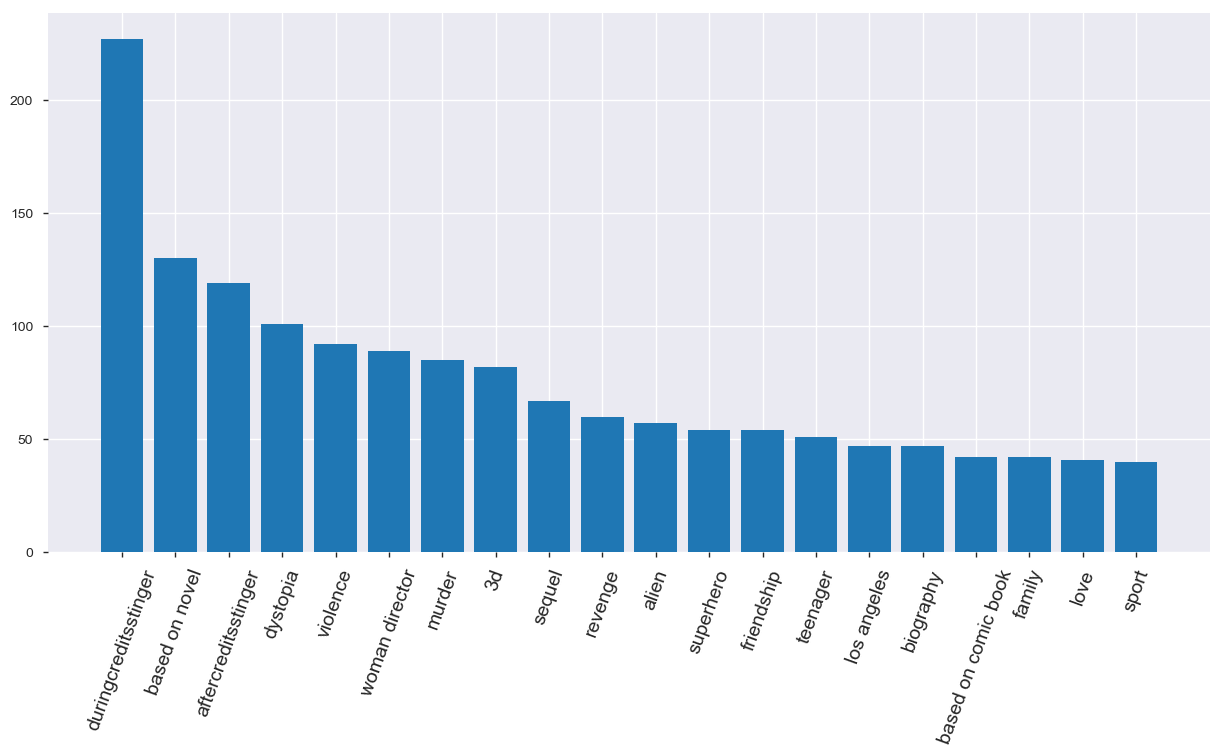

In [10]:
keywords = collections.Counter()
for ind in imdb_data.index:
    kw = imdb_data.keywords[ind]
    kw = re.sub('\"', '\'', kw)
    keywords.update(re.findall('\'([^\']*)\'', kw))


most_common = dict(keywords.most_common(21)[1:])
plt.figure(figsize=(15,7))
plt.bar(range(len(most_common)), list(most_common.values()), align='center')
plt.xticks(range(len(most_common)), list(most_common.keys()),rotation=70, fontsize=14)
plt.show()

When observing the keywords associated with the movies, we can see that they can be divided into several categories. The first and most common category marks the existence of a during- or post- credits scene (*duringcreditsstinger*, *aftercreditsstinger*). Another category of keywords informs that the movie is based on a novel or a comic book. The other ones supplement the genre of the movie (*dystopia*, *violence*, *superhero*...). And of course, we have the *woman director* keyword, which tells us that there is a specific 'tag' for movies that were directed by a woman, while a movie directed by a man is almost a default.

# Data analysis by genres

In the following part, we have decided to test how different features are represented or correlated with different movie genres. As previously explained, each movie can have one or more out of 18 genres that are all contained in the **GENRES_COLS** list.

In [11]:
GENRES_COLS = ['Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
       'Science Fiction', 'Thriller', 'War', 'Western']

The *average_col_by_genre()* method will be used to graphically represent the means of different features across different genres using bar charts. 

In [12]:
def average_col_by_genre(df, colnames, norm_factor=1, labels=None, figsize=None):
    coldf = pd.DataFrame(
        data=np.array([
            [
                (np.mean(df[df[genre] == 1][colname]) / norm_factor) for genre in GENRES_COLS
            ] for colname in colnames
        ]).transpose(), 
        index=[col[col.rfind('.')+1:] for col in GENRES_COLS], 
        columns=(labels or colnames)
    )
    ax = coldf.plot(kind='bar', figsize=(figsize or (15, 10)), legend=True, fontsize=13)
    plt.xticks(rotation=45, ha='right')
    plt.title("Average {} by Genre".format(', '.join(labels or colnames)), fontsize=16)
    plt.legend(prop={'size':14})

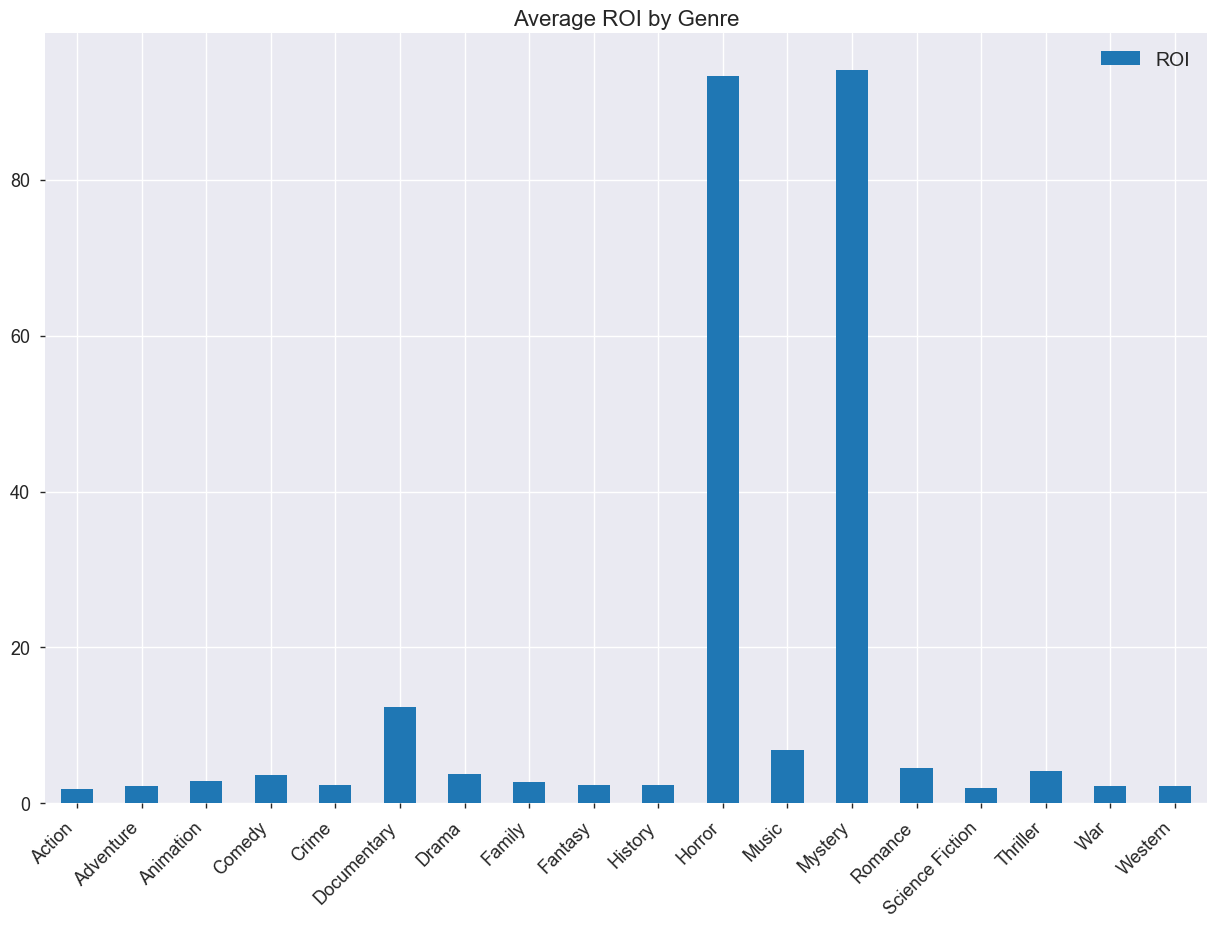

In [13]:
average_col_by_genre(features_df, ['roi'],  labels=['ROI'])

We comparing different ROI values across genres, we can see that movies that correspond to the genres of *Horror* and *Mystery* have significantly higher return on investment than the other genres. The only other genres with slightly higher values of ROI are *Documentary* and *Music*. These can all probably be attributed to the fact that there are some very famous movies that have achieved significantly higher revenues than it was expected by the initial budget.

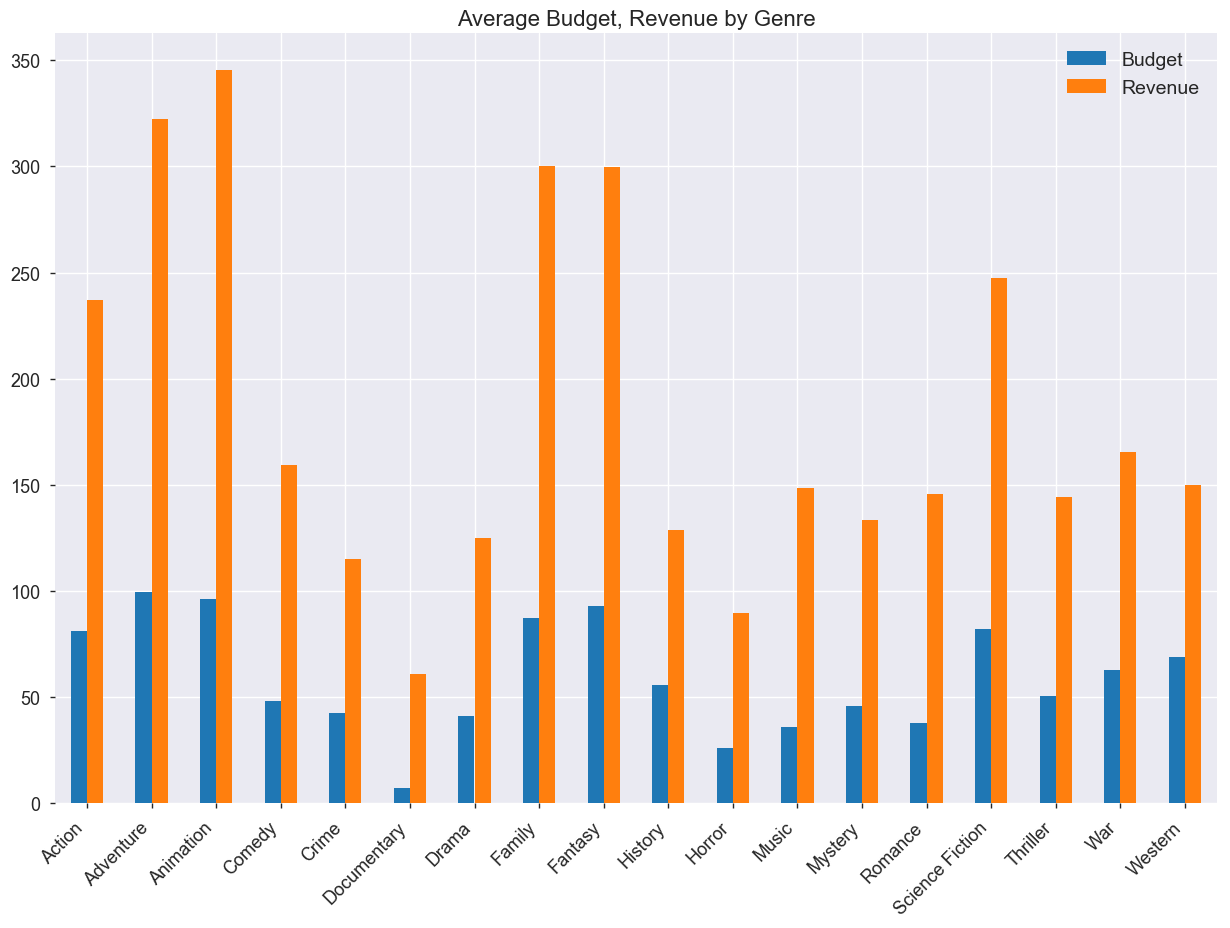

In [14]:
average_col_by_genre(features_df, ['budget', 'revenue'], norm_factor=1000000, labels=['Budget', 'Revenue'])

The findings from the previous plot are in a way confirmed when observing the average budget and revenue by genres. We can see that the lowest budgets are given to movies of genre *Documentary*, *Horror* and *Music*. On the other hand, the movies with the highest budgets are usually the *Adventure*, *Animation* and *Fantasy* movies, which can be attributed to incredibly high costs of animation and special effects required for their successful filming.  We can also see that the movies with highest revenues usually fall into categories of *Action*, *Adventure*, *Animation*, *Family*, *Fantasy* and *Science Fiction*, which explains why the creators and sponsors are willing to invest so much money in their filming. It is also important to note that even with sporadic ‘flops’ that leave the movies with revenues lower than their initial budgets, average revenue by genre is always higher than the average budget which means that flops are much rarer than they appear to be.

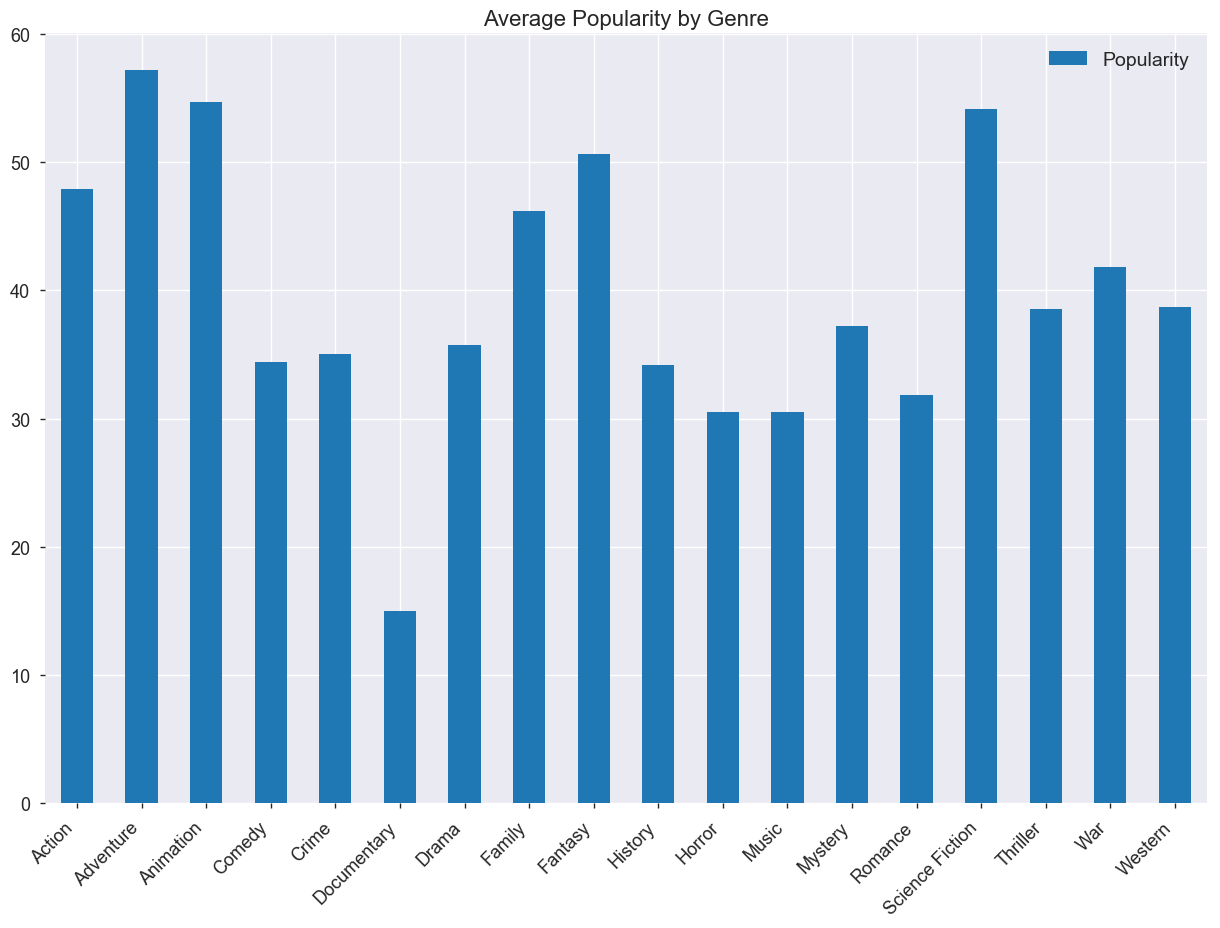

In [15]:
average_col_by_genre(features_df, ['popularity'], labels=['Popularity'])

When comparing average popularity by genre we can see that the movies that are generating the highest buzz are again the ones that usually have a lot of special effects and explore some ‘exotic’ and interesting topics, as for example *Adventure*, *Animation* and *Science Fiction*. On the other hand, more realistic topics that are usually explored in the documentaries gain the least amount of popularity.

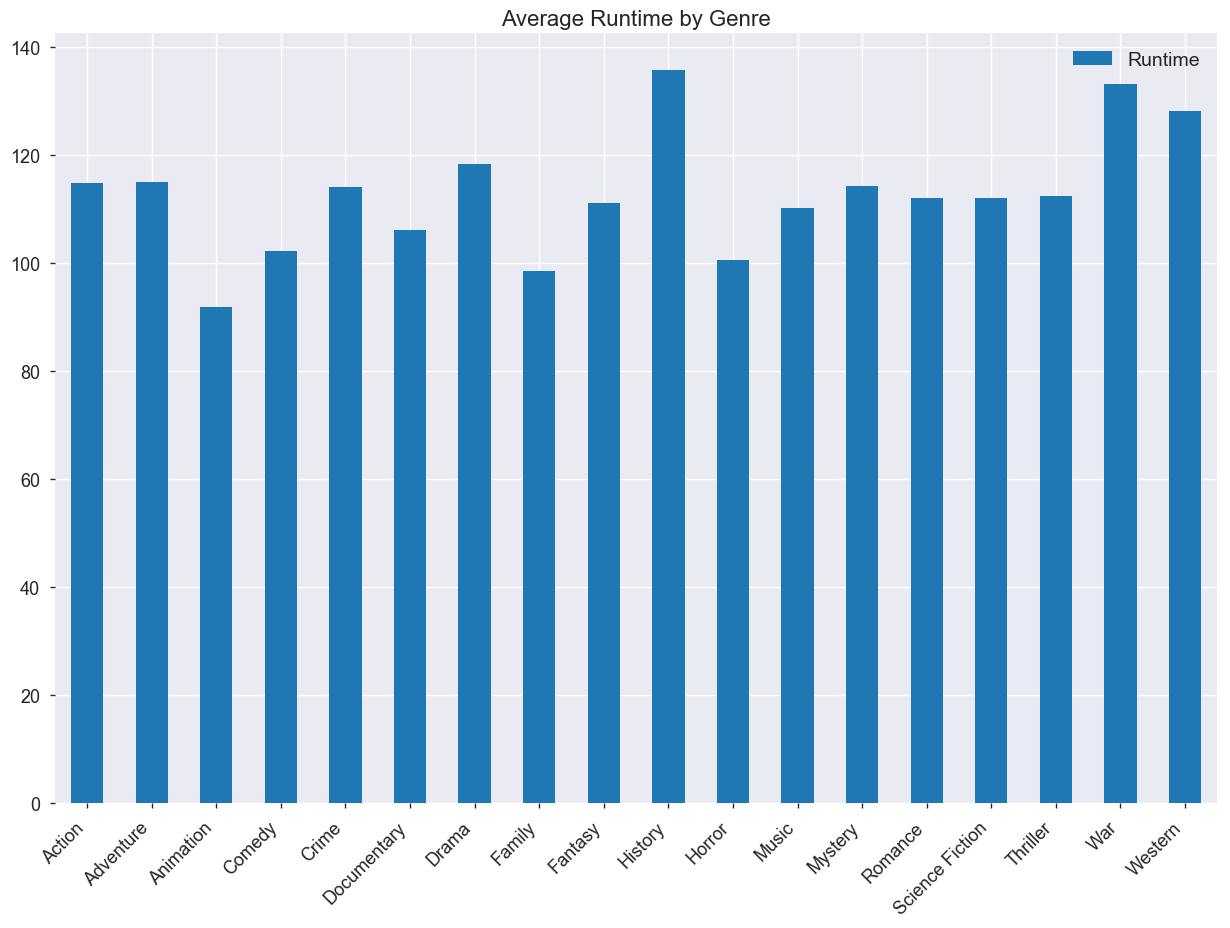

In [16]:
average_col_by_genre(features_df, ['runtime'], labels=['Runtime'])

As we have all experienced, in the recent years the runtime of movies has become significantly larger than in the previously popular movies. We can see that almost all of the genres nowadays have a runtime larger than 100 minutes. The genres with the longest average runtime are *History* and *War*, which is somewhat expected as these movies deal with the topics that are hard to sum up in less than 2 hours. On the other hand, *Animation* and *Family* movies are in general shorter than 100 minutes as they are generally intended for younger audiences that do not have enough concentration and strength to wait throughout very long movie sessions.

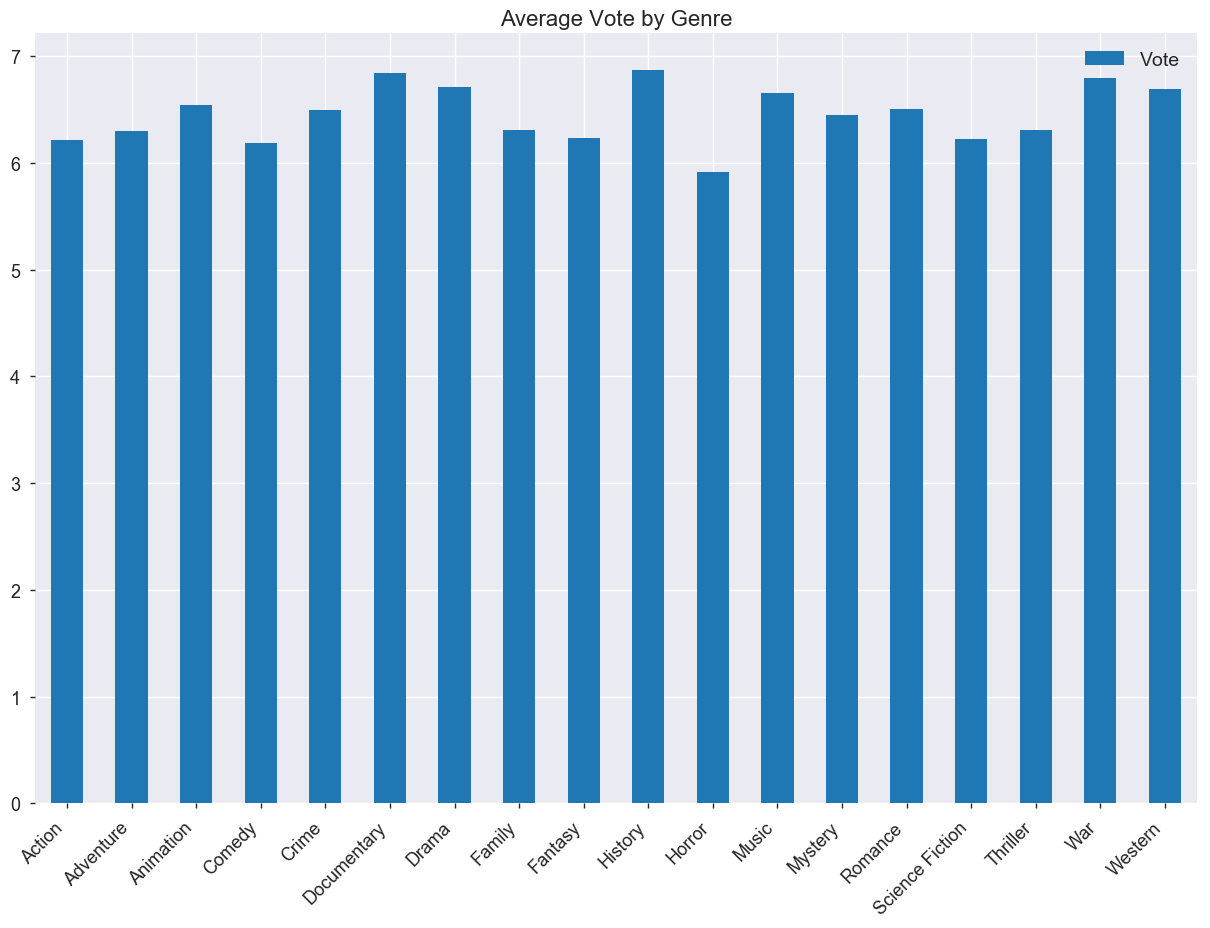

In [17]:
average_col_by_genre(features_df, ['vote_average'], labels=['Vote'])

We can see that most of the movie genres have very similar vote averages, and that the grades that the users give are generally favorable, and except in the case of horrors always larger than 6. The genres with the highest average grade by audiences are *Documentary*, *History*, *War* and *Western* which means that most of the users that graded them gave them very good grades, but does not generally say a lot about their general popularity.

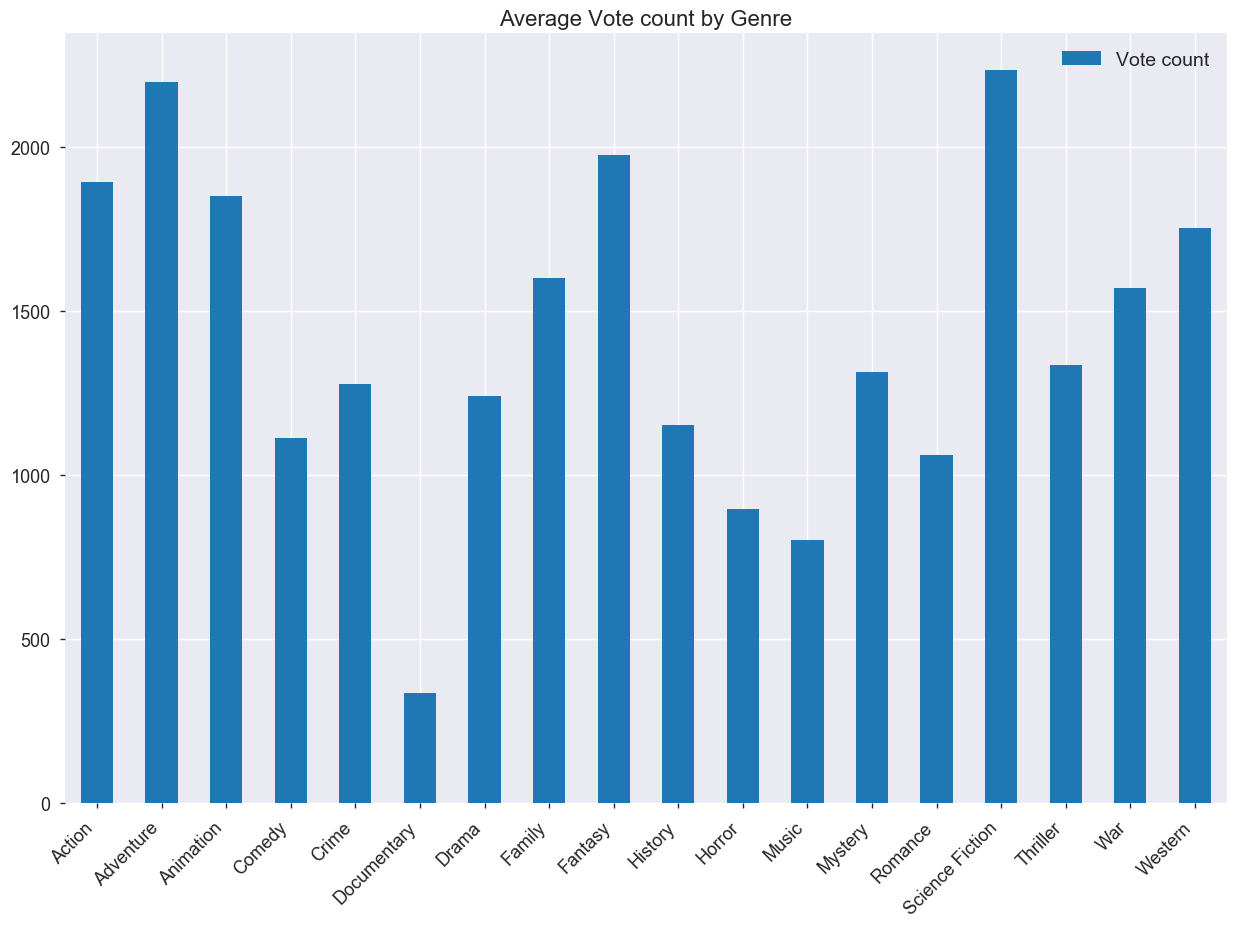

In [18]:
average_col_by_genre(features_df, ['vote_count'], labels=['Vote count'])

On the other hand, when we try to compare the genres by the average vote count that the movies within that genre received we get very interesting insights. The movies that users reviewed the most usually come from the genres like *Adventure*, *Fantasy* and *Science Fiction*, which also might hint to the fact that the largest number of users has seen them. On the other hand, the documentaries have the lowest number of votes attached to them.

# Release date analysis

By looking into the DataFrame which contains movie features, we can see that one of the very important movie characteristics that we did not analyze enough at the moment is the one containing information about the movie’s release date. We cannot just look into the most popular release dates or average release dates, as these would not have a lot of actual meaning.

In [19]:
features_df.head()

,movie_id,title,budget,popularity,release_date,revenue,runtime,vote_average,vote_count,Action,...,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western,roi
0,19995,Avatar,237000000,150.437577,2009-12-10,2787965087,162.0,7.2,11800,1,...,0,0,0,0,0,1,0,0,0,10.763566
1,285,Pirates of the Caribbean: At World's End,300000000,139.082615,2007-05-19,961000000,169.0,6.9,4500,1,...,0,0,0,0,0,0,0,0,0,2.203333
2,206647,Spectre,245000000,107.376788,2015-10-26,880674609,148.0,6.3,4466,1,...,0,0,0,0,0,0,0,0,0,2.594590
3,49026,The Dark Knight Rises,250000000,112.312950,2012-07-16,1084939099,165.0,7.6,9106,1,...,0,0,0,0,0,0,1,0,0,3.339756
4,49529,John Carter,260000000,43.926995,2012-03-07,284139100,132.0,6.1,2124,1,...,0,0,0,0,0,1,0,0,0,0.092843


Instead, we split the release date column into three new columns, containing the *year*, *month* and *day* when a specific movie was released. We will save the results into the helper DataFrame **features_df_split_date**.

In [20]:
features_df_split_date = features_df.copy()

features_df_split_date['year']=[d.split('-')[0] for d in features_df_split_date.release_date]
features_df_split_date['month']=[d.split('-')[1] for d in features_df_split_date.release_date]
features_df_split_date['day']=[d.split('-')[2] for d in features_df_split_date.release_date]

features_df_split_date.head(5)

,movie_id,title,budget,popularity,release_date,revenue,runtime,vote_average,vote_count,Action,...,Mystery,Romance,Science Fiction,Thriller,War,Western,roi,year,month,day
0,19995,Avatar,237000000,150.437577,2009-12-10,2787965087,162.0,7.2,11800,1,...,0,0,1,0,0,0,10.763566,2009,12,10
1,285,Pirates of the Caribbean: At World's End,300000000,139.082615,2007-05-19,961000000,169.0,6.9,4500,1,...,0,0,0,0,0,0,2.203333,2007,05,19
2,206647,Spectre,245000000,107.376788,2015-10-26,880674609,148.0,6.3,4466,1,...,0,0,0,0,0,0,2.594590,2015,10,26
3,49026,The Dark Knight Rises,250000000,112.312950,2012-07-16,1084939099,165.0,7.6,9106,1,...,0,0,0,1,0,0,3.339756,2012,07,16
4,49529,John Carter,260000000,43.926995,2012-03-07,284139100,132.0,6.1,2124,1,...,0,0,1,0,0,0,0.092843,2012,03,07


Now that we have more meaningful information format for the movie release dates, we can group the movies by their month and year, and try looking into different revenues that were obtained for movies released in different time periods.

In [21]:
df_date = features_df_split_date[["month", "year", "revenue"]].groupby(["month", "year"]).mean()
df_date['revenue']=df_date['revenue']/1000
df_date=df_date.reset_index()

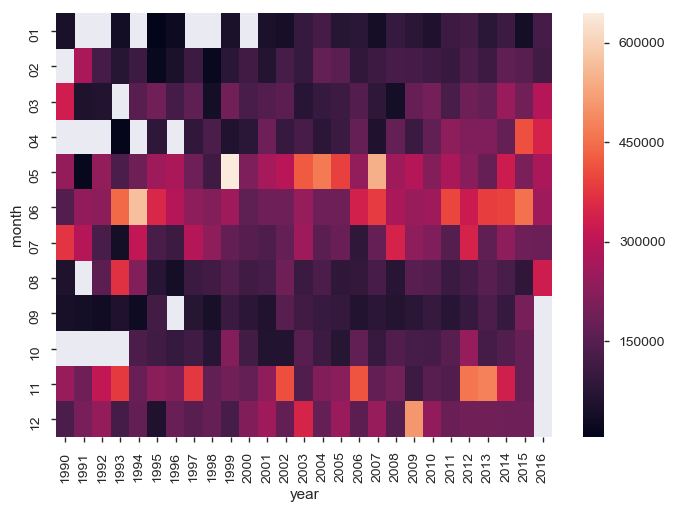

In [22]:
df_date = df_date.pivot("month", "year", "revenue")
ax = sns.heatmap(df_date)

From the heatmap we have created we can see that the term ‘summer blockbuster’ is a very realistic concept as the months of May and June have been giving great revenues to the movies that were released in this period. Additionally we can see that almost each of the years has a significantly larger revenue in either November or December, because that is a very popular movie season, both because of the holidays, but also because the preparations for the award season start in the beginning of January.

# Correlations

Afterwards, we decided to further analyze some of the interesting correlations that can be observed between different data features. For each property pair we will first determine their exact correlation coefficient, and then plot them in order to see how the actual values are distributed. We wil start by comparing the **vote_average** and **vote_count** features.

In [23]:
np.corrcoef([features_df.vote_average, features_df.vote_count])[0,1]

0.43699922510233347

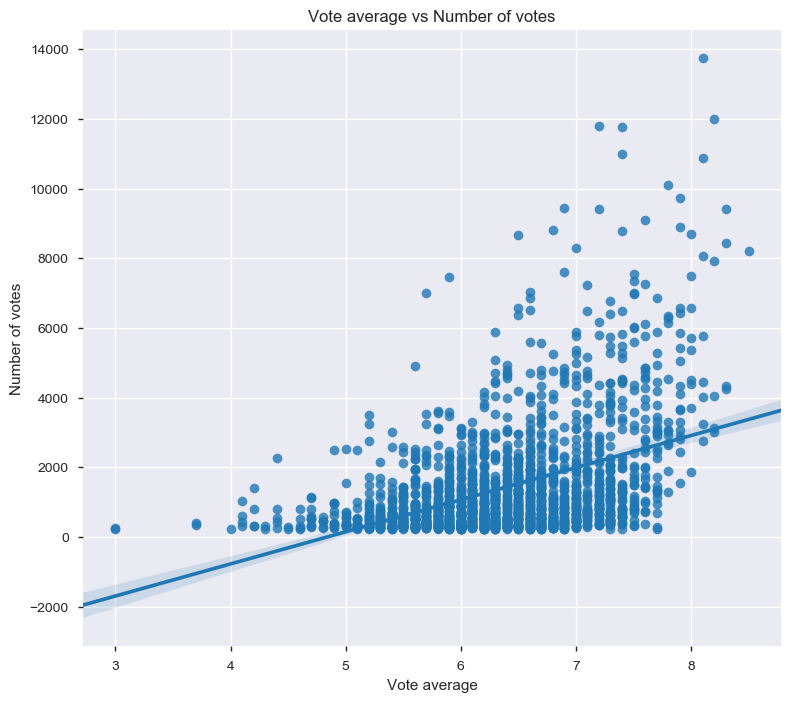

In [24]:
plt.figure(figsize=(9,8))
sns.regplot(x=features_df.vote_average, y=features_df.vote_count)
plt.xlabel('Vote average')
plt.ylabel('Number of votes')
plt.title('Vote average vs Number of votes');

As can be seen both from the plot and the correlation coefficient, there is a relatively strong correlation between these two features. As the number of voters increases, usually so does the vote average. One important observation that can be made is that when a movie has above 8000 voters the average vote is always higher than 6. This is due to the fact that when so many viewers have seen the movie and took the time to review it, it means that it is a generally very popular movie.

Next features we looked into are the **vote_average** and **revenue**.

In [25]:
np.corrcoef([features_df.vote_average, features_df.revenue])[0,1]

0.19818158813213746

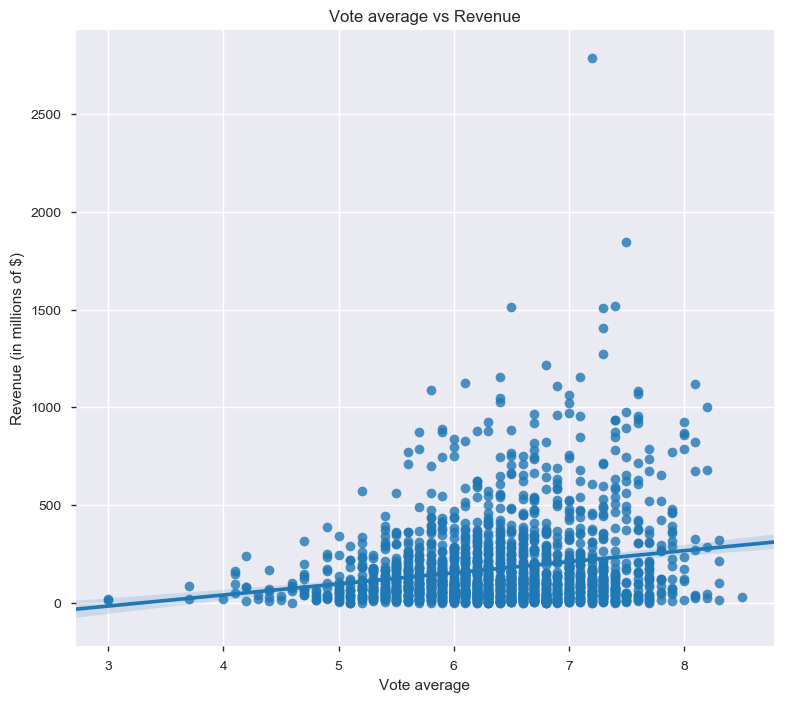

In [26]:
plt.figure(figsize=(9,8))
sns.regplot(x=features_df.vote_average, y=features_df.revenue / 1000000)
plt.xlabel('Vote average')
plt.ylabel('Revenue (in millions of $)');
plt.title('Vote average vs Revenue');

The correlation between these two features is not as significant as the previous one. In general most of the highly graded movies have good revenues. On the other hand, the movies with revenue higher than one billion always have a viewer grade higher than 5.5.

A very interesting correlation case can be observed when comparing the **vote_count** and **revenue**.

In [27]:
np.corrcoef([features_df.vote_count, features_df.revenue])[0,1]

0.724886372126475

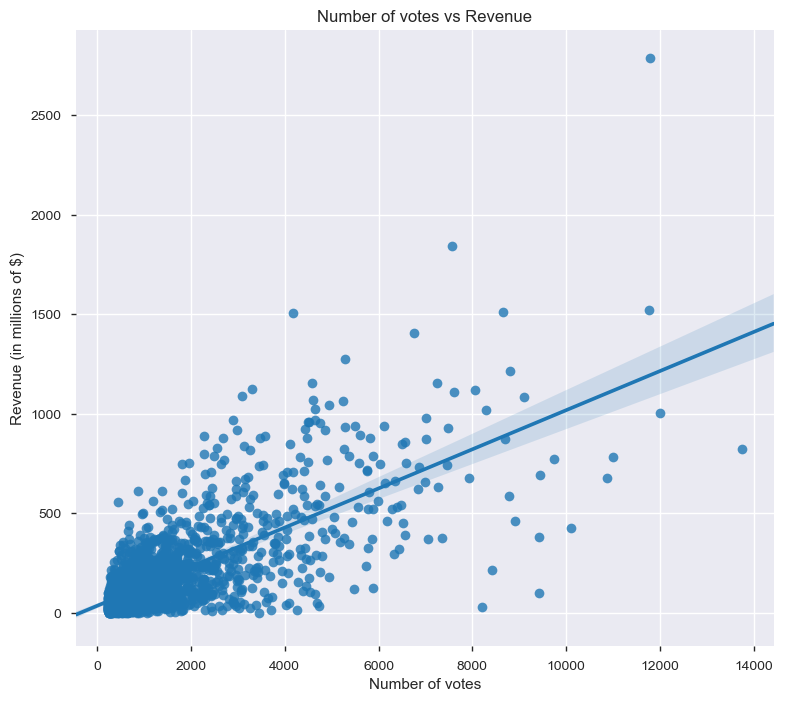

In [28]:
plt.figure(figsize=(9,8))
sns.regplot(x=features_df.vote_count, y=features_df.revenue / 1000000)

plt.xlabel('Number of votes')
plt.ylabel('Revenue (in millions of $)');
plt.title('Number of votes vs Revenue');

We can see that the correlation coefficient is very high, and that the number of votes and revenue in millions get larger at the same time. Both of these can probably be explained by the rise in the number of viewers that go to see a specific movie. As this number rises, so do the movie's revenues, but also the number of viewers that might take some time to review the movie.

Similar behavior can be observed when looking into correlation between **popularity** and **revenue** features.

In [29]:
np.corrcoef([features_df.popularity, features_df.revenue])[0,1]

0.541686802838906

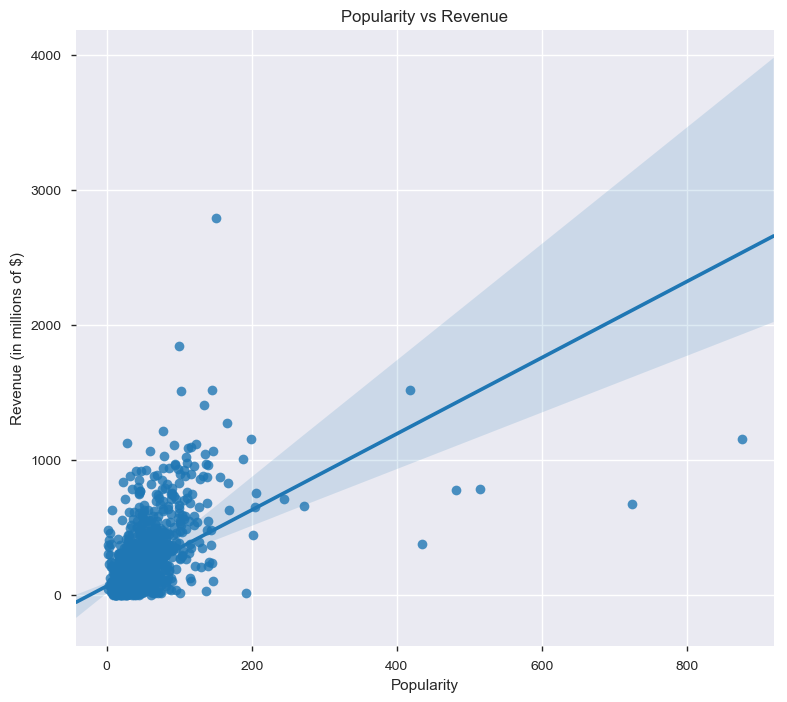

In [30]:
plt.figure(figsize=(9,8))
sns.regplot(x=features_df.popularity, y=features_df.revenue / 1000000)

plt.xlabel('Popularity')
plt.ylabel('Revenue (in millions of $)');
plt.title('Popularity vs Revenue');

The popularity of the movies generally follows a similar pattern as their revenues. However, in the case of this feature although a strong correlation of over 0.5 is observed, there are some exceptions that have incredibly high popularity levels even with quite low revenues. These can probably be explained by some fan favorite movies that have never gained a wide recognition in the time of their initial release, but have maintained a popular following in the years that followed.

Another strong correlation can be observed in the case of the **budget** and **revenue** features.

In [31]:
np.corrcoef([features_df.budget, features_df.revenue])[0,1]

0.6952153603008373

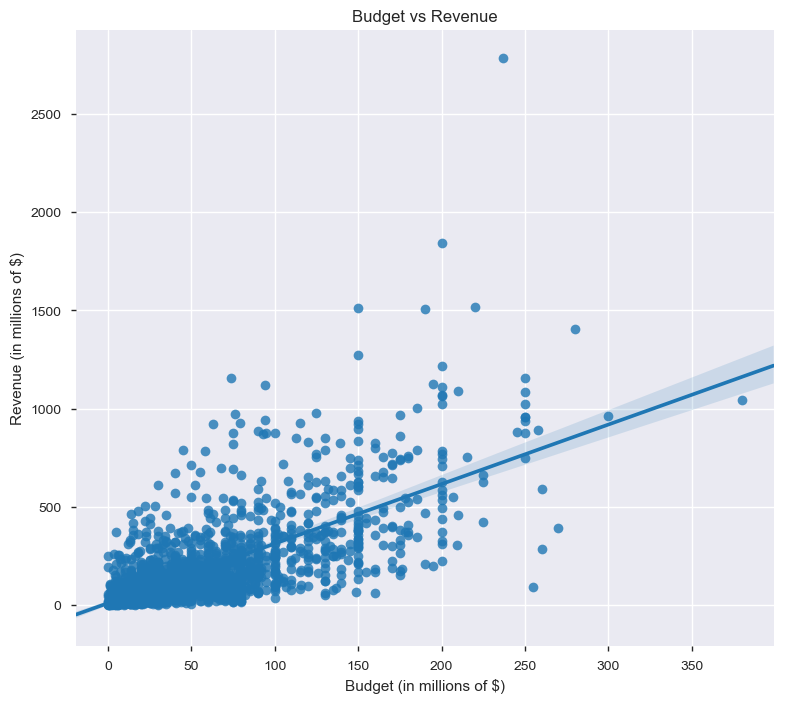

In [32]:
plt.figure(figsize=(9,8))
sns.regplot(x=features_df.budget / 1000000, y=features_df.revenue / 1000000)

plt.xlabel('Budget (in millions of $)')
plt.ylabel('Revenue (in millions of $)');
plt.title('Budget vs Revenue');

Budget and revenue are in general highly correlated, as having a larger amount of available resources enables the movie creators to make movies of greater quality and that will thus attract many interested viewers. Specifically in this case, the higher budget can also be demonstrated in the very elaborate marketing campaigns that will motivate many new viewers to come to see the movie, and enlarge the obtained revenue. 

In the end we can try to observe the correlations that might exist between the **roi** feature, and the **budget** and **revenue** features it was calculated from.

In [33]:
np.corrcoef([features_df.budget, features_df.roi])[0,1]

-0.03762115055453588

In [34]:
np.corrcoef([features_df.revenue, features_df.roi])[0,1]

0.006516066584833778

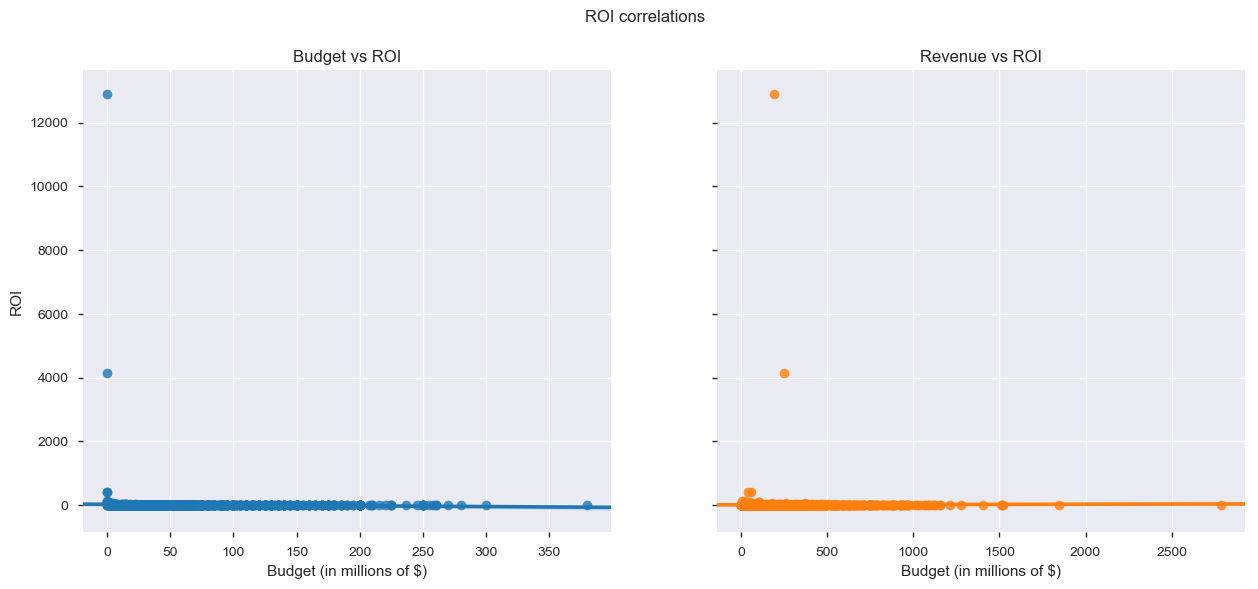

In [35]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.set_size_inches(15, 6)
f.suptitle('ROI correlations')
sns.regplot(x=features_df.budget / 1000000, y=features_df.roi, ax = ax1)
ax1.set(xlabel='Budget (in millions of $)', ylabel='ROI')
ax1.set_title('Budget vs ROI')

sns.regplot(x=features_df.revenue / 1000000, y=features_df.roi, ax = ax2)
ax2.set(xlabel='Budget (in millions of $)', ylabel='')
ax2.set_title('Revenue vs ROI')

plt.show()

From the calculated correlation coefficients it can immediately be seen that the features are behaving in the expected manner, and as they were supposed to have no correlation (by the definition of **roi** calculation) they have very very low correlation coefficients. When we try to visualize these features on the plots similar to previous ones, we can also observe that the data is not at all distributed along the two axes, but is instead almost all grouped along the x axis of the diagram.

In the end, another interesting correlation that might be useful for our data exploitation is given in the plot showing the distribution of movie votes across different vote counts. 

Text(0,0.5,'Count of votes')

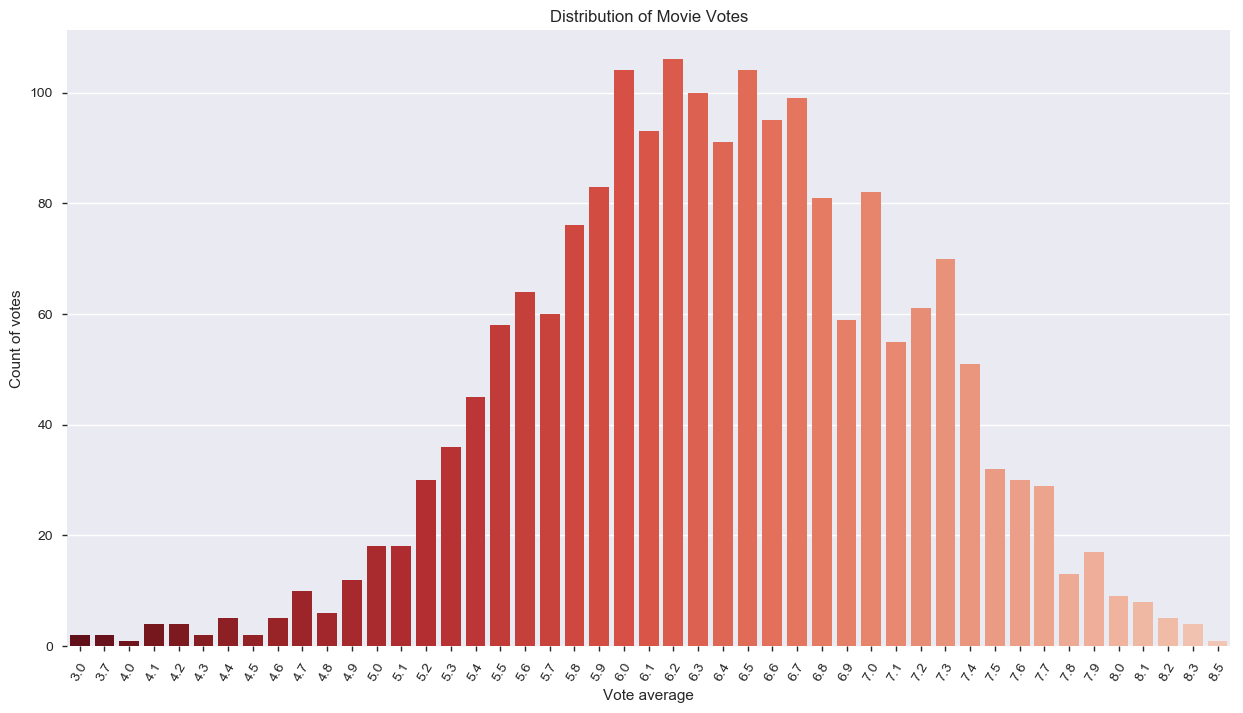

In [36]:
plt.figure(figsize=(15,8))
sns.countplot(x = 'vote_average', data = features_df, palette = sns.color_palette("Reds", 60)[::-1])
plt.xticks(rotation=60)
plt.title("Distribution of Movie Votes")
plt.xlabel("Vote average")
plt.ylabel("Count of votes")

It can be seen that in general most of the viewers will give medium grades to the movies, and that there is only a small number of viewers that will give a movie a grade that is lower than 5 or larger than 8. Thus most of the movies will have generally mixed or good reviews, and only the ones that are particularly bad or good will fall into any other category.